# GIK2KM - Lab 3 - More Data Analysis Laboratory

## 7 - One-way ANOVA, or Kruskal-Wallis Test


One-way Analysis of Variance (ANOVA) is used when comparing three or more groups of data on the interval/ratio scale.

Assignment: We have three groups with seven observations per group, as follows: http://users.du.se/∼rny/datascience/data/webcount2.csv

The file contains the number of visits (by the thousands) per week on three national websites (located in Sweden, Finland, and Norway). The websites are owned by the same company. The websites have a similar content (essentially only the written language differs), but the target audience are located in the three different countries. The manager team wants to know if the number of website visits are equal between the three websites, or not. Perform a Oneway ANOVA test and find out!

1. Formulate your null hypothesis (H0) and its alternative hypothesis (Ha) based on the problem.

### Svar

H0 = Means are equal. There is no difference in the means of the population group.  
H1 = Means are not equal. There is a difference in the means of the population group.

2. Read the file. There are three columns; a website in Sweden, website in Finland, website in Norway. Each row represent the number of website visits per week (by the thousands).

In [1]:
import pandas as pd

data = pd.read_csv("https://users.du.se/~rny/datascience/data/webcount2.csv", delimiter=";", decimal=",")
swe = data['websiteSWE']
fin = data['websiteFIN']
nor = data['websiteNOR']
data

,websiteSWE,websiteFIN,websiteNOR
0,18.2,17.4,15.2
1,20.1,18.7,18.8
2,17.6,19.1,17.7
3,16.8,16.4,16.5
4,18.8,15.9,15.9
5,19.7,18.4,17.1
6,19.1,17.7,16.7
7,21.0,17.9,14.3
8,15.0,17.3,18.0
9,19.6,19.0,16.8


3. Present summary statistics for the three groups

In [2]:
print(swe.describe(),"\n")
print(fin.describe(),"\n")
print(nor.describe(),"\n")

count    11.000000
mean     18.663636
std       1.687171
min      15.000000
25%      17.900000
50%      19.100000
75%      19.650000
max      21.000000
Name: websiteSWE, dtype: float64 

count    11.000000
mean     17.536364
std       1.297130
min      15.100000
25%      16.850000
50%      17.700000
75%      18.550000
max      19.100000
Name: websiteFIN, dtype: float64 

count    11.000000
mean     16.727273
std       1.266563
min      14.300000
25%      16.200000
50%      16.800000
75%      17.400000
max      18.800000
Name: websiteNOR, dtype: float64 



4. Display confidence intervals for the three groups, one for each.

In [3]:
import scipy.stats as stats
import numpy as np

ci_swe = stats.t.interval(0.95, df=len(swe)-1, loc=np.mean(swe), scale=stats.sem(swe))
print("websiteSWE:", ci_swe)

ci_fin = stats.t.interval(0.95, df=len(fin)-1, loc=np.mean(fin), scale=stats.sem(fin))
print("websiteFIN:", ci_fin)

ci_nor = stats.t.interval(0.95, df=len(nor)-1, loc=np.mean(nor), scale=stats.sem(nor))
print("websiteNOR:", ci_nor)

websiteSWE: (17.53017956839288, 19.797093158879846)
websiteFIN: (16.664940047686724, 18.407787225040547)
websiteNOR: (15.876384129936984, 17.57816132460847)


5. Display the three groups as boxplots

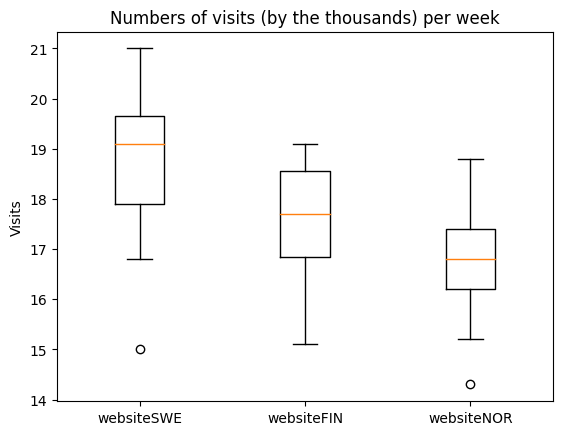

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bp = ax.boxplot(data)
ax.set_xticklabels(['websiteSWE', 'websiteFIN', 'websiteNOR'])
ax.set_ylabel('Visits')
ax.set_title('Numbers of visits (by the thousands) per week')

plt.show()

6. Provide arguments for stating that your data samples are normal or not. Support your arguments with:  
a) qualitative assessment on the box plots above (or additional histograms)  
b) qualitative assessment by using QQ plots  
c) quantitative assessment by using the Shapiro-Wilks Test

### Answer

A. The box plot above shows us two outliers. Both are significantly lower than the majority of the values. One outlier can be found at around 15 for websiteSWE and one aroud 14.3 for websiteNOR.

In [5]:
# Write code for B here

B. X

In [6]:
print('Normality test:')
print('websiteSWE:', stats.shapiro(swe))
print('websiteFIN:', stats.shapiro(fin))
print('websiteNOR:', stats.shapiro(nor))

Normality test:
websiteSWE: ShapiroResult(statistic=0.9394252300262451, pvalue=0.5137653946876526)
websiteFIN: ShapiroResult(statistic=0.9414898753166199, pvalue=0.5381695628166199)
websiteNOR: ShapiroResult(statistic=0.978549599647522, pvalue=0.9575585722923279)


C. Wiki säger om data:

    If the p value is greater than 0.20, the conclusion is that the data is normally distributed.

Med den infon så kan vi konstatera att datat anses vara normalfördelat.

7. Check for outliers and display the result(s). State your conclusion for presence or non-presence of outliers and your actions taken.

In [7]:
print("SWE Statistics:", stats.describe(swe))
print("FIN Statistics:", stats.describe(fin))
print("NOR Statistics:", stats.describe(nor))

SWE Statistics: DescribeResult(nobs=11, minmax=(15.0, 21.0), mean=18.663636363636364, variance=2.8465454545454545, skewness=-0.8476356691501512, kurtosis=0.12034448845111223)
FIN Statistics: DescribeResult(nobs=11, minmax=(15.1, 19.1), mean=17.536363636363635, variance=1.682545454545455, skewness=-0.5332291415000516, kurtosis=-0.7832423845921066)
NOR Statistics: DescribeResult(nobs=11, minmax=(14.3, 18.8), mean=16.727272727272727, variance=1.6041818181818184, skewness=-0.3345856150698085, kurtosis=-0.32310175604756086)


### Svar

Vi ser att SWE och NOR har 2 outliers på boxplotten men vi kollar max och minvärden igen (taget från upg 3). Här ser vi med datan från boxplotten att 15.0 i SWE är en outlier och inte ligger inom spannet. Vi ser också att NOR har en outlier med värdet 14.3.

8. based on your conclusions about the normality of data either carry a Oneway ANOVA test, or a Kruskal-Wallis Test

In [8]:
stats.f_oneway(swe, fin, nor)

F_onewayResult(statistic=5.0889336851154665, pvalue=0.012503039662104238)

9. Motivate whether H0 should be rejected or not. Explain your thoughts based on the result

### Svar

Eftersom p-värdet är lägre än vår signifikansnivå (0.05) så har vi tillräckligt med info för att säga att det finns olikheter i vår tre grupper och kan förkasta H0.

10. If H0 was rejected, perform a post-hoc test namely the Tukeys HSD test to see which group(s) are different. Explain your thoughts.

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

a = [18.2,20.1,17.6,16.8,18.8,19.7,19.1,21,15,19.6,19.4]
b = [17.4,18.7,19.1,16.4,15.9,18.4,17.7,17.9,17.3,19,15.1]
c = [15.2,18.8,17.7,16.5,15.9,17.1,16.7,14.3,18,16.8,17]


# IF you see that the overall p-value from the ANOVA table is lower than your ALPHA value, then 
#  you can conclude that the mean values across each group are NOT equal.
# In order to decide to determine exactly which group means are different, perform Tukey’s HSD Test 

# Use the data above, or recreate DataFrame to hold data
df = pd.DataFrame({'score': [18.2,20.1,17.6,16.8,18.8,19.7,19.1,21,15,19.6,19.4] + [17.4,18.7,19.1,16.4,15.9,18.4,17.7,17.9,17.3,19,15.1] + [15.2,18.8,17.7,16.5,15.9,17.1,16.7,14.3,18,16.8,17],
                     'group': ['a'] * 11 + ['b'] * 11 + ['c'] * 11}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

#There is a statistically significant difference between the means of 
# groups a and b and groups b and c, but not a statistically significant 
# difference between the means of groups a and c.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b  -1.1273 0.1713 -2.6303  0.3758  False
     a      c  -1.9364 0.0094 -3.4394 -0.4333   True
     b      c  -0.8091 0.3916 -2.3121  0.6939  False
----------------------------------------------------


## 8 - Chi-Square (χ2) Goodness-of-Fit test
Chi-Square (χ2) Goodness-of-Fit test is a non-parametric test that is used to find out how the observed value of a given phenomena is significantly different from the expected value. In Chi-Square goodness of fit test, the term Goodness-of-Fit is used to compare the observed sample distribution with the expected probability distribution.

Chi-Square goodness of fit test determines how well theoretical distribution (such as normal, uniform, binomial, or Poisson) fits the empirical distribution. In Chi-Square goodness of fit test, sample data is divided into intervals. Then the numbers of points that fall into the interval are compared, with the expected numbers of points in each interval.

Assignment: The People Code, created by Dr. Taylor Hartman, divides personalities into four colors: Red (motivated by power), Blue (motivated by intimacy), White (motivated by peace), and Yellow (motivated by fun). Although different groups of people have different demographics, the general breakdown suggests that Reds comprise 25% of the population; Blues 35%; Whites 20%; and Yellows 20%. 300 respondents were to answer a 45-question test which assesses one’s color, based on whether you answer A, B, C, or D. After analysing the test results, the 300 responents were assigned the classes as in Table 1.

Table 1:
| Red | Blue | White | Yellow |
| --- | ---- | ----- | ------ |
| 117 | 123  | 75    | 65     |

Can we conclude your collected sample represents the distribution of the population? That is, how "good" do the data "fit" the expected probability model?

1. Formulate your null hypothesis (H0) and its alternative hypothesis (Ha) based on the problem above.

H0 = The test is representative of the population  
H1 = The test is **not** representative of the population

2. Which are the observed values?

In [10]:
observed = [117, 123, 75, 65]

print(observed)

[117, 123, 75, 65]


3. Which are the expected values and expected relative frequency i.e. the
expected probability distribution?

In [11]:
proportions = [0.25, 0.35, 0.20, 0.20]
total_respondents = sum(observed)
expected = [p * total_respondents for p in proportions]

print(proportions)
print(expected)

[0.25, 0.35, 0.2, 0.2]
[95.0, 133.0, 76.0, 76.0]


4. Motivate whether H0 should be rejected or not. Explain your thoughts based
on the result.

In [12]:
from scipy.stats import chisquare

statistic, p_value = chisquare(observed, f_exp=expected)
print('Statistic=%.5f, p=%.3f' % (statistic, p_value))

alpha = 0.05

if p_value > alpha:
    print('Eftersom p-värdet är större än 0.05 så kan vi acceptera H0 och vi kan därför säga att det är samma fördelning.')
else:
    print('Eftersom p-värdet är mindre eller lika med 0.05 så förkastar vi H0 och vi kan därför inte säga att det är samma fördelning.')

Statistic=7.45188, p=0.059
Eftersom p-värdet är större än 0.05 så kan vi acceptera H0 och vi kan därför säga att det är samma fördelning.


5. **Note: This assignment has nothing to do with what is stated above**  
Create and demonstrate an example using the other Chi-Square test, i.e. Chi-Square, Test of Independence.

H0 = There is no relation between income level and education.  
H1 = There is a relation between income level and education.  

In [13]:
import numpy as np
from scipy.stats import chi2_contingency

observed = np.array([
    [20, 15],
    [25, 20],
    [15, 5]
])

statistic, p_value, df, expected = chi2_contingency(observed)

print("Statistic:", statistic)
print("P-value:", p_value)
print("Degrees of freedom:", df)
print("Observed:", observed, sep="\n")
print("Expected:", expected, sep="\n")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is no relationship between education and income.")
else:
    print("Fail to reject the null hypothesis: There's a relationship between education and income.")

Statistic: 2.3644179894179893
P-value: 0.3066007106491661
Degrees of freedom: 2
Observed:
[[20 15]
 [25 20]
 [15  5]]
Expected:
[[21. 14.]
 [27. 18.]
 [12.  8.]]
Fail to reject the null hypothesis: There's a relationship between education and income.


## 9 - Paired t-test or Wilcoxon Signed Rank Test

A random sample of 20 students were collected. During the test, two measurements (i.e test results) of each person were taken, one before and one after a set of teaching sessions.

1. What is the ”treatment” in this case?

2. Formulate your null hypothesis (H0) and its alternative hypothesis (Ha) based on the problem.

3. Read the file https://users.du.se/∼rny/datascience/data/diagnosticTest.csv. There are three columns; The student number, test result before teaching, test result after teaching. Each row represent the same subject measurements before and after.

4. Present summary statistics for the two groups (i.e. the before and after mea- sures, respectively)

5. Display the confidence intervals, one for each

6. Display the data groups before and after as boxplots


7. Provide arguments for stating that your data samples are normal or not. Support your arguments with:
(a) qualitative assessment on the box plots above (or additional histograms) (b) qualitative assessment by using QQ plots
(c) quantitative assessment by using the Shapiro-Wilks Test.

8. Check for outliers and display the result(s). State your conclusion for presence or non-presence of outliers and your actions taken.


9. Provide arguments if the data is normal or not, and based on that conclusion perform a Paired t-test, or a Wilcoxon Signed Rank Test

10. Motivate whether H0 should be rejected or not. Explain your thoughts based on the result